In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
%matplotlib inline

## Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


In [3]:
cust = pd.read_csv('Wholesale Customer.csv')
cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [5]:
cust['Spend']= cust['Fresh']+cust['Milk']+cust['Grocery']+cust['Frozen']+cust['Detergents_Paper']+cust['Delicatessen']

In [6]:
cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [7]:
cust1=pd.pivot_table(cust,index=['Region'],aggfunc=sum)
cust1

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Spend
Region,,,,,,,,
Lisbon,18095,104327,204136,854833,231026,570037,422454,2386813
Oporto,14899,54506,173311,464721,190132,433274,239144,1555088
Other,64026,512110,890410,3960577,930492,2495251,1888759,10677599


In [8]:
cust2=pd.pivot_table(cust,index=['Channel'],aggfunc=sum)
cust2

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931


In [9]:
cust3=cust.groupby(['Region','Channel'])['Spend'].sum()
cust3=cust3.sort_values()
cust3

Region  Channel
Oporto  Hotel       719150
        Retail      835938
Lisbon  Retail      848471
        Hotel      1538342
Other   Retail     4935522
        Hotel      5742077
Name: Spend, dtype: int64

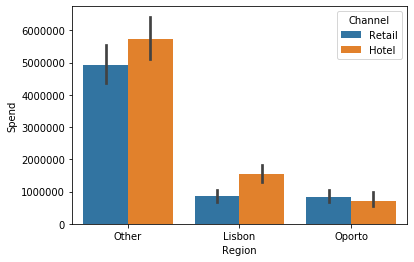

In [10]:
sns.barplot(x='Region',y='Spend',hue='Channel',data=cust,estimator=np.sum);

In [11]:
cust3.head(1)

Region  Channel
Oporto  Hotel      719150
Name: Spend, dtype: int64

In [12]:
cust3.tail(1)

Region  Channel
Other   Hotel      5742077
Name: Spend, dtype: int64

In [13]:
cust4=pd.pivot_table(cust,index='Region',aggfunc='sum').T
cust4

Region,Lisbon,Oporto,Other
Buyer/Spender,18095,14899,64026
Delicatessen,104327,54506,512110
Detergents_Paper,204136,173311,890410
Fresh,854833,464721,3960577
Frozen,231026,190132,930492
Grocery,570037,433274,2495251
Milk,422454,239144,1888759
Spend,2386813,1555088,10677599


In [14]:
cust5=cust4.drop(['Buyer/Spender','Spend'],axis=0)
cust5['Lisbon'].sort_values(ascending=False)

Fresh               854833
Grocery             570037
Milk                422454
Frozen              231026
Detergents_Paper    204136
Delicatessen        104327
Name: Lisbon, dtype: int64

In [15]:
cust5['Oporto'].sort_values(ascending=False)

Fresh               464721
Grocery             433274
Milk                239144
Frozen              190132
Detergents_Paper    173311
Delicatessen         54506
Name: Oporto, dtype: int64

In [16]:
cust5['Other'].sort_values(ascending=False)

Fresh               3960577
Grocery             2495251
Milk                1888759
Frozen               930492
Detergents_Paper     890410
Delicatessen         512110
Name: Other, dtype: int64

In [17]:
cust6=pd.pivot_table(cust,index='Channel',aggfunc='sum').T
cust6

Channel,Hotel,Retail
Buyer/Spender,71034,25986
Delicatessen,421955,248988
Detergents_Paper,235587,1032270
Fresh,4015717,1264414
Frozen,1116979,234671
Grocery,1180717,2317845
Milk,1028614,1521743
Spend,7999569,6619931


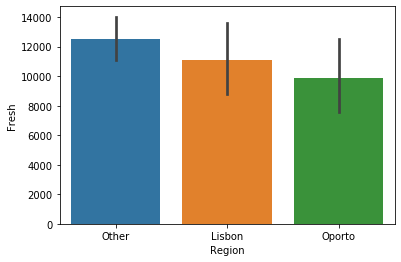

In [18]:
sns.barplot(x='Region',y='Fresh',data=cust)

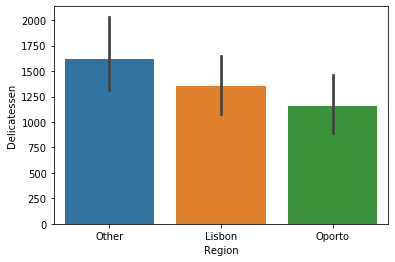

In [19]:
sns.barplot(x='Region',y='Delicatessen',data=cust)

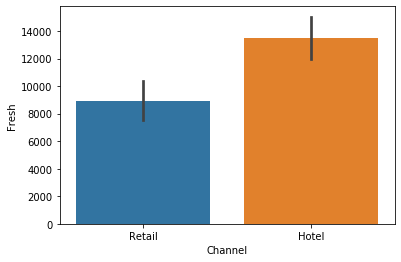

In [20]:
sns.barplot(x='Channel',y='Fresh',data=cust)

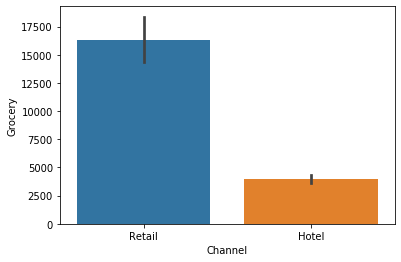

In [21]:
sns.barplot(x='Channel',y='Grocery',data=cust)

In [22]:
cust7=cust6.drop(['Buyer/Spender','Spend'],axis=0)
cust7['Hotel'].sort_values(ascending=False)

Fresh               4015717
Grocery             1180717
Frozen              1116979
Milk                1028614
Delicatessen         421955
Detergents_Paper     235587
Name: Hotel, dtype: int64

In [23]:
cust7['Retail'].sort_values(ascending=False)

Grocery             2317845
Milk                1521743
Fresh               1264414
Detergents_Paper    1032270
Delicatessen         248988
Frozen               234671
Name: Retail, dtype: int64

In [24]:
pd.pivot_table(cust.drop(['Buyer/Spender','Spend'],axis=1),index=['Region','Channel'])

Delicatessen  Detergents_Paper         Fresh       Frozen  \
Region Channel                                                              
Lisbon Hotel     1197.152542        950.525424  12902.254237  3127.322034   
       Retail    1871.944444       8225.277778   5200.000000  2584.111111   
Oporto Hotel     1105.892857        482.714286  11650.535714  5745.035714   
       Retail    1239.000000       8410.263158   7289.789474  1540.578947   
Other  Hotel     1518.284360        786.682464  13878.052133  3656.900474   
       Retail    1826.209524       6899.238095   9831.504762  1513.200000   

                     Grocery          Milk  
Region Channel                              
Lisbon Hotel     4026.135593   3870.203390  
       Retail   18471.944444  10784.000000  
Oporto Hotel     4395.500000   2304.250000  
       Retail   16326.315789   9190.789474  
Other  Hotel     3886.734597   3486.981043  
       Retail   15953.809524  10981.009524

In [25]:
print('The Coefficient of Variation of Fresh:', stats.variation(cust['Fresh']))
print('The Coefficient of Variation of Grocery:', stats.variation(cust['Grocery']))
print('The Coefficient of Variation of Milk:', stats.variation(cust['Milk']))
print('The Coefficient of Variation of Frozen:', stats.variation(cust['Frozen']))
print('The Coefficient of Variation of Detergents_Paper:', stats.variation(cust['Detergents_Paper']))
print('The Coefficient of Variation of Delicatessen:', stats.variation(cust['Delicatessen']))

The Coefficient of Variation of Fresh: 1.0527196084948243
The Coefficient of Variation of Grocery: 1.1938154477492668
The Coefficient of Variation of Milk: 1.27185083074245
The Coefficient of Variation of Frozen: 1.578535529860776
The Coefficient of Variation of Detergents_Paper: 1.6527657881041735
The Coefficient of Variation of Delicatessen: 1.8473041039189302


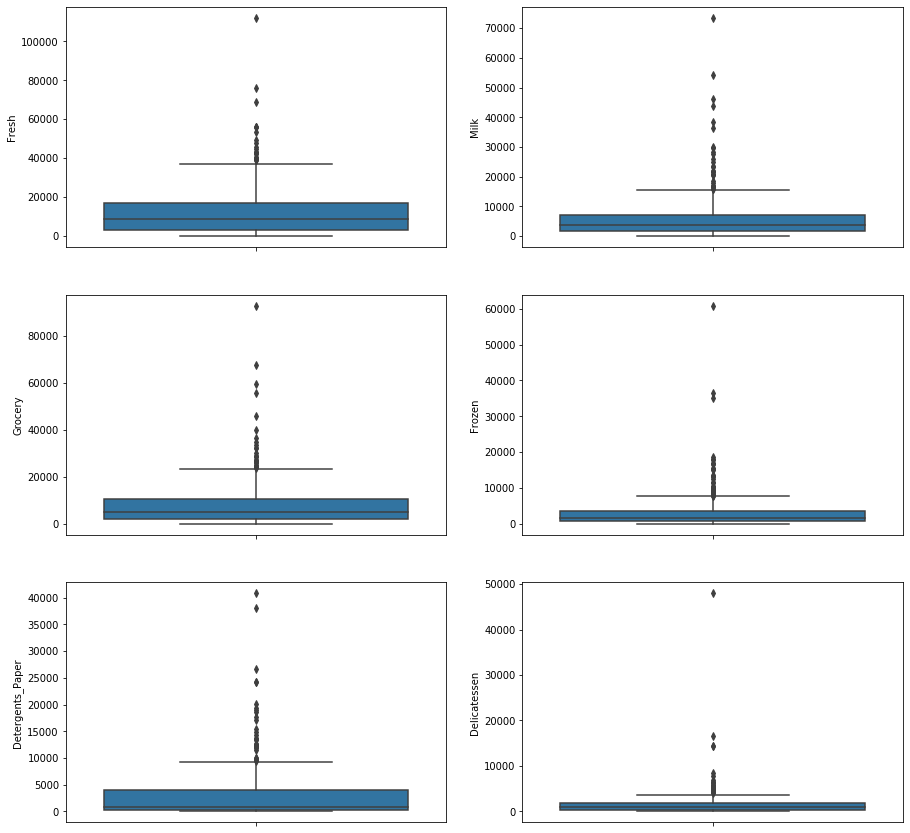

In [26]:
fig,axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(cust['Fresh'],orient="v",ax=axes[0][0]);
sns.boxplot(cust['Milk'],orient="v",ax=axes[0][1]);
sns.boxplot(cust['Grocery'],orient="v",ax=axes[1][0]);
sns.boxplot(cust['Frozen'],orient="v",ax=axes[1][1]);
sns.boxplot(cust['Detergents_Paper'],orient="v",ax=axes[2][0]);
sns.boxplot(cust['Delicatessen'],orient="v",ax=axes[2][1]);

In [35]:
pd.pivot_table(cust,index=['Region','Channel'],aggfunc=np.mean)

Buyer/Spender  Delicatessen  Detergents_Paper         Fresh  \
Region Channel                                                                
Lisbon Hotel       237.728814   1197.152542        950.525424  12902.254237   
       Retail      226.055556   1871.944444       8225.277778   5200.000000   
Oporto Hotel       321.000000   1105.892857        482.714286  11650.535714   
       Retail      311.105263   1239.000000       8410.263158   7289.789474   
Other  Hotel       227.582938   1518.284360        786.682464  13878.052133   
       Retail      152.438095   1826.209524       6899.238095   9831.504762   

                     Frozen       Grocery          Milk         Spend  
Region Channel                                                         
Lisbon Hotel    3127.322034   4026.135593   3870.203390  26073.593220  
       Retail   2584.111111  18471.944444  10784.000000  47137.277778  
Oporto Hotel    5745.035714   4395.500000   2304.250000  25683.928571  
       Retail   1540.578947  16326.315789   9190.789474  43996.736842  
Other  Hotel    3656.900474   3886.734597   3486.981043  27213.635071  
       Retail   1513.200000  15953.809524  10981.009524  47004.971429

In [65]:
cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [55]:
pd.pivot_table(cust,values='Buyer/Spender',index=['Region'],aggfunc=sum)

,Buyer/Spender
Region,
Lisbon,18095
Oporto,14899
Other,64026


In [66]:
pd.pivot_table(cust,values='Buyer/Spender',index=['Region'])

,Buyer/Spender
Region,
Lisbon,235.000000
Oporto,317.000000
Other,202.613924


In [56]:
pd.pivot_table(cust,values='Buyer/Spender',index=['Channel'],aggfunc=sum)

,Buyer/Spender
Channel,
Hotel,71034
Retail,25986


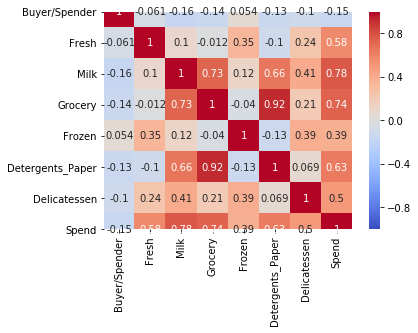

In [62]:
cust_corr=cust.corr()
sns.heatmap(cust_corr,cmap='coolwarm',vmin=-1,vmax=1,square=True,annot=True);

In [63]:
cust['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [64]:
cust['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [157]:
survey = pd.read_csv('Survey-1.csv')
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [158]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [159]:
pd.crosstab(survey['Gender'],survey['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [160]:
pd.crosstab(survey['Gender'],survey['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [161]:
pd.crosstab(survey['Gender'],survey['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [162]:
pd.crosstab(survey['Gender'],survey['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [163]:
survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [164]:
n_male = survey[survey['Gender'].str.contains("Male")]
n_male=n_male.groupby('Gender').size()
n_male

Gender
Male    29
dtype: int64

In [165]:
n_gender = survey['Gender'].size
n_gender

62

In [166]:
P_Male = n_male/n_gender
P_Male

Gender
Male    0.467742
dtype: float64

In [167]:
n_female = survey[survey['Gender'].str.contains("Female")]
n_female = n_female.groupby('Gender').size()
n_female

Gender
Female    33
dtype: int64

In [168]:
P_Female = n_female/n_gender
P_Female

Gender
Female    0.532258
dtype: float64

In [174]:
gender_probs = survey.groupby('Gender').size().div(len(survey))
gender_probs

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [175]:
survey.groupby(['Major','Gender']).size().div(len(survey)).div(gender_probs, axis=0, level='Gender')

Major                   Gender
Accounting              Female    0.090909
                        Male      0.137931
CIS                     Female    0.090909
                        Male      0.034483
Economics/Finance       Female    0.212121
                        Male      0.137931
International Business  Female    0.121212
                        Male      0.068966
Management              Female    0.121212
                        Male      0.206897
Other                   Female    0.090909
                        Male      0.137931
Retailing/Marketing     Female    0.272727
                        Male      0.172414
Undecided               Male      0.103448
dtype: float64

In [178]:
survey.groupby(['Grad Intention','Gender']).size().div(len(survey)).div(gender_probs, axis=0, level='Gender')

Grad Intention  Gender
No              Female    0.272727
                Male      0.103448
Undecided       Female    0.393939
                Male      0.310345
Yes             Female    0.333333
                Male      0.586207
dtype: float64

In [179]:
survey.groupby(['Employment','Gender']).size().div(len(survey)).div(gender_probs, axis=0, level='Gender')

Employment  Gender
Full-Time   Female    0.090909
            Male      0.241379
Part-Time   Female    0.727273
            Male      0.655172
Unemployed  Female    0.181818
            Male      0.103448
dtype: float64

In [180]:
survey.groupby(['Computer','Gender']).size().div(len(survey)).div(gender_probs, axis=0, level='Gender')

Computer  Gender
Desktop   Female    0.060606
          Male      0.103448
Laptop    Female    0.878788
          Male      0.896552
Tablet    Female    0.060606
dtype: float64

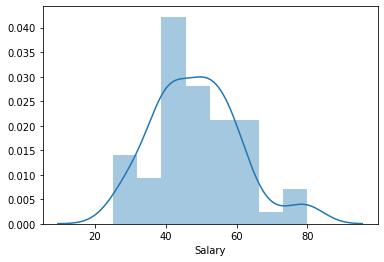

In [184]:
sns.distplot(survey['Salary']);

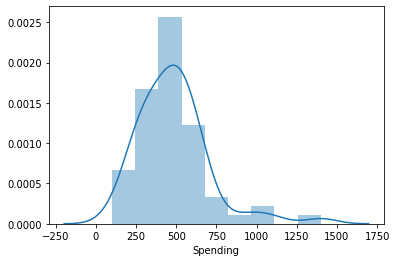

In [185]:
sns.distplot(survey['Spending']);

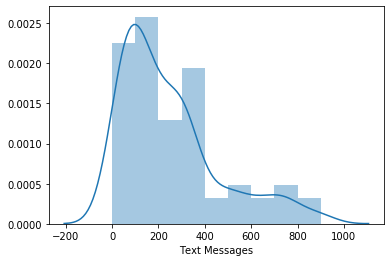

In [186]:
sns.distplot(survey['Text Messages']);

In [188]:
survey[['Salary','Spending','Text Messages']].skew().sort_values(ascending=False)

Spending         1.585915
Text Messages    1.295808
Salary           0.534701
dtype: float64

In [189]:
survey[['Salary','Spending','Text Messages']].describe()

,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000
mean,48.548387,482.016129,246.209677
std,12.080912,221.953805,214.465950
min,25.000000,100.000000,0.000000
25%,40.000000,312.500000,100.000000
50%,50.000000,500.000000,200.000000
75%,55.000000,600.000000,300.000000
max,80.000000,1400.000000,900.000000


In [191]:
shingles = pd.read_csv('A & B shingles-1.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [192]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

In [193]:
t_stat_A,p_value_A = ttest_1samp(shingles['A'],0.35)
print('One sample t test for A Shingles')
print('t_stat_A:',t_stat_A)
print('p_value_A:',p_value_A/2)

One sample t test for A Shingles
t_stat_A: -1.4735046253382782
p_value_A: 0.07477633144907513


In [195]:
t_stat_B,p_value_B = ttest_1samp(shingles['B'],0.35,nan_policy='omit')
print('One sample t test for B Shingles')
print("t_stat_B:",t_stat_B)
print('p_value_B:',p_value_B/2)

One sample t test for B Shingles
t_stat_B: -3.1003313069986995
p_value_B: 0.0020904774003191826


In [197]:
t_stat,p_value = ttest_ind(shingles['A'],shingles['B'].dropna(),equal_var=False)
print('Two sample t test for A Shingles and B Shingles')
print('t_stat:',t_stat)
print('p_value:',p_value)

Two sample t test for A Shingles and B Shingles
t_stat: 1.2885080295255027
p_value: 0.20225822050217818
